<a href="https://colab.research.google.com/github/Imran0897/Automated-Text-Summarization-Project/blob/main/Automated_Text_Summarization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import pickle
import nltk
from nltk import word_tokenize
from nltk.stem import LancasterStemmer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,LSTM,Embedding,Dense,Concatenate,Attention
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import os

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
pip install statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7438 sha256=8e95c0eb7557c6136e93007aa4a181894ab640a0c4e9a5ef1df47716f1d77543
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics


In [3]:
from statistics import mode

In [4]:
os.chdir('/content/drive/MyDrive/Kudosware_Task')

In [5]:
df = pd.read_parquet('/content/drive/MyDrive/Kudosware_Task/cnn_dailymail-test.parquet', engine='pyarrow')

In [6]:
df.head()

,article,highlights,id
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f


In [7]:
df.drop(columns=['id'],inplace=True)

In [8]:
df.isnull().sum()

article       0
highlights    0
dtype: int64

In [9]:
df.drop_duplicates(subset=['article'],inplace=True)

In [10]:
df = df[:1000]

In [11]:
len(df)

1000

In [12]:
input_data = df['article']

In [13]:
target_data= df['highlights']

In [14]:
target_data.replace('', np.nan, inplace=True)

<ipython-input-14-81d88acc500b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data.replace('', np.nan, inplace=True)


# Preprocessing

In [15]:
input_texts = []
target_texts = []
input_words = []
target_words = []
stop_words = set(stopwords.words('english'))

In [16]:
stop_words.remove('no')

In [17]:
stop_words.remove('not')

In [18]:
stemm = LancasterStemmer()

In [19]:
def clean(texts,src):
    texts = BeautifulSoup(texts,"lxml").text
    words = word_tokenize(texts.lower())
    words= list(filter(lambda w:(w.isalpha() and len(w)>=3),words))

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
contractions=pickle.load(open("/content/drive/MyDrive/Kudosware_Task/contractions.pkl","rb"))['contractions']

In [22]:
contractions

{"ain't": 'is not',
 "aren't": 'are not',
 "can't": 'cannot',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'll": 'he will',
 "he's": 'he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "i'd": 'i would',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'll've": 'i will have',
 "i'm": 'i am',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'm

In [23]:
def clean(texts,src):
    texts = BeautifulSoup(texts,"lxml").text
    words = word_tokenize(texts.lower())
    words= list(filter(lambda w:(w.isalpha() and len(w)>=3),words))
    words = [contractions[w] if w in contractions else w for w in words]
    if src== "inputs":
        words = [stemm.stem(w) for w in words if w not in stop_words]
    else:
        words = [w for w in words if w not in stop_words]
    return words

In [24]:
for in_txt,tr_txt in zip(input_data,target_data):
  in_words= clean(in_txt,"inputs")
  input_texts+= [' '.join(in_words)]
  input_words+= in_words
  #add 'sos' at start and 'eos' at end of text
  tr_words= clean("sos "+tr_txt+" eos","target")
  target_texts+= [' '.join(tr_words)]
  target_words+= tr_words

<ipython-input-23-08ffc6942ec7>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  texts = BeautifulSoup(texts,"lxml").text


In [25]:
input_texts

['cnn palestin auth off becam memb intern crimin court wednesday step giv court jurisdict alleg crim palestin territ form access mark ceremony hagu netherland court bas palestin sign icc found rom statut janu also acceiv jurisdict alleg crim commit occupy palestin territ includ east jerusalem sint jun lat mon icc op prelimin examin situ palestin territ pav way poss war crim investig israel memb court palestin may subject wel israel unit stat neith icc memb oppos palestin effort join body palestin foreign min riad speak wednesday ceremony said mov toward gre just palestin form becom stat party rom statut today world also step clos end long er impun injust said accord icc new releas indee today bring clos shar goal just peac judg kuniko ozak vic presid icc said acc treaty first step palestin rom statut today ent forc stat palestin palestin acquir right wel respons com stat party statut subst commit not tak light said right group hum right watch welcom develop govern seek pen palestin joi

In [26]:
target_texts

['sos membership gives icc jurisdiction alleged crimes committed palestinian territories since last june israel united states opposed move could open door war crimes investigations israelis eos',
 'sos theia bully breed mix apparently hit car whacked hammer buried field true miracle dog deserves good life says sara mellado looking home theia eos',
 'sos mohammad javad zarif spent time john kerry foreign minister participated takeover iranian consulate san francisco iranian foreign minister tweets english eos',
 'sos americans exposed ebola virus sierra leone march another person diagnosed disease taken hospital maryland national institutes health says patient fair condition weeks treatment eos',
 'sos student longer duke university campus face disciplinary review school officials identified student investigation person admitted hanging noose duke says noose made rope discovered campus eos',
 'sos basketball star asks girl syndrome high school prom pictures two gone viral eos',
 'sos am

In [27]:
input_words = sorted(list(set(input_words)))
target_Words = sorted(list(set(target_words)))
num_in_words = len(input_words)
num_tr_words = len(target_Words)

max_in_len = mode([len(i) for i in input_texts])
max_tr_len = mode([len(i) for i in target_texts])

print("number of input words : ",num_in_words)
print("number of target words : ",num_tr_words)
print("maximum input length : ",max_in_len)
print("maximum target length : ",max_tr_len)

number of input words :  15448
number of target words :  6734
maximum input length :  1179
maximum target length :  134


In [28]:
x_train,x_test,y_train,y_test = train_test_split(input_texts,target_texts,test_size=0.2,random_state=144)

In [29]:
in_tokenizer = Tokenizer()
in_tokenizer.fit_on_texts(x_train)
tr_tokenizer = Tokenizer()
tr_tokenizer.fit_on_texts(y_train)

x_train = in_tokenizer.texts_to_sequences(x_train)
y_train = tr_tokenizer.texts_to_sequences(y_train)

In [30]:

in_tokenizer.fit_on_texts(x_test)

tr_tokenizer.fit_on_texts(y_test)

x_test = in_tokenizer.texts_to_sequences(x_test)
y_test = tr_tokenizer.texts_to_sequences(y_test)

In [31]:
en_in_data = pad_sequences(x_train,maxlen = max_in_len,padding='post')
dec_data = pad_sequences(y_train,maxlen=max_tr_len,padding='post')

dec_in_data = dec_data[:,:-1]
dec_tr_data = dec_data.reshape(len(dec_data),max_tr_len,1)[:,1:]

In [32]:
en_in_data = pad_sequences(x_test,maxlen = max_in_len,padding='post')
dec_data = pad_sequences(y_test,maxlen=max_tr_len,padding='post')

dec_in_data = dec_data[:,:-1]
dec_tr_data = dec_data.reshape(len(dec_data),max_tr_len,1)[:,1:]

In [33]:
dec_in_data

array([[   1,   24, 1087, ...,    0,    0,    0],
       [   1,  204, 1145, ...,    0,    0,    0],
       [   1,    4,  364, ...,    0,    0,    0],
       ...,
       [   1, 6726, 6727, ...,    0,    0,    0],
       [   1, 3018, 1826, ...,    0,    0,    0],
       [   1,  678,  474, ...,    0,    0,    0]], dtype=int32)

In [34]:
dec_tr_data

array([[[  24],
        [1087],
        [  52],
        ...,
        [   0],
        [   0],
        [   0]],

       [[ 204],
        [1145],
        [1298],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   4],
        [ 364],
        [1096],
        ...,
        [   0],
        [   0],
        [   0]],

       ...,

       [[6726],
        [6727],
        [6728],
        ...,
        [   0],
        [   0],
        [   0]],

       [[3018],
        [1826],
        [3046],
        ...,
        [   0],
        [   0],
        [   0]],

       [[ 678],
        [ 474],
        [1011],
        ...,
        [   0],
        [   0],
        [   0]]], dtype=int32)

In [35]:
K.clear_session()
latent_dim = 50
en_inputs = Input(shape=(max_in_len,))
en_embedding = Embedding(num_in_words+1,latent_dim)(en_inputs)

In [36]:
en_lstm1 = LSTM(latent_dim,return_state=True,return_sequences=True)
en_outputs1,state_h1,state_c1 = en_lstm1(en_embedding)

en_lstm2 = LSTM(latent_dim,return_state=True,return_sequences=True)
en_outputs2,state_h2,state_c2 = en_lstm2(en_outputs1)

en_lstm3 = LSTM(latent_dim,return_sequences=True,return_state=True)
en_outputs3 , state_h3,state_c3 = en_lstm3(en_outputs2)

en_states = [state_h3,state_c3]

In [37]:
dec_inputs = Input(shape = (None,))
dec_emb_layer = Embedding(num_tr_words+1,latent_dim)
dec_embedding = dec_emb_layer(dec_inputs)

dec_lstm = LSTM(latent_dim,return_sequences=True,return_state = True)
dec_outputs,*_ = dec_lstm(dec_embedding,initial_state = en_states)

In [38]:
attention = Attention()
attn_out = attention([dec_outputs,en_outputs3])

merge = Concatenate(axis = -1,name = 'concat_layer1')([dec_outputs,attn_out])

In [39]:
dec_dense = Dense(num_tr_words+1,activation = 'softmax')
dec_outputs=dec_dense(merge)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1179)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1179, 50)     772450      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 1179, 50),   20200       ['embedding[0][0]']              
                                 (None, 50),                                                      
                                 (None, 50)]                                                      
                                                                                              

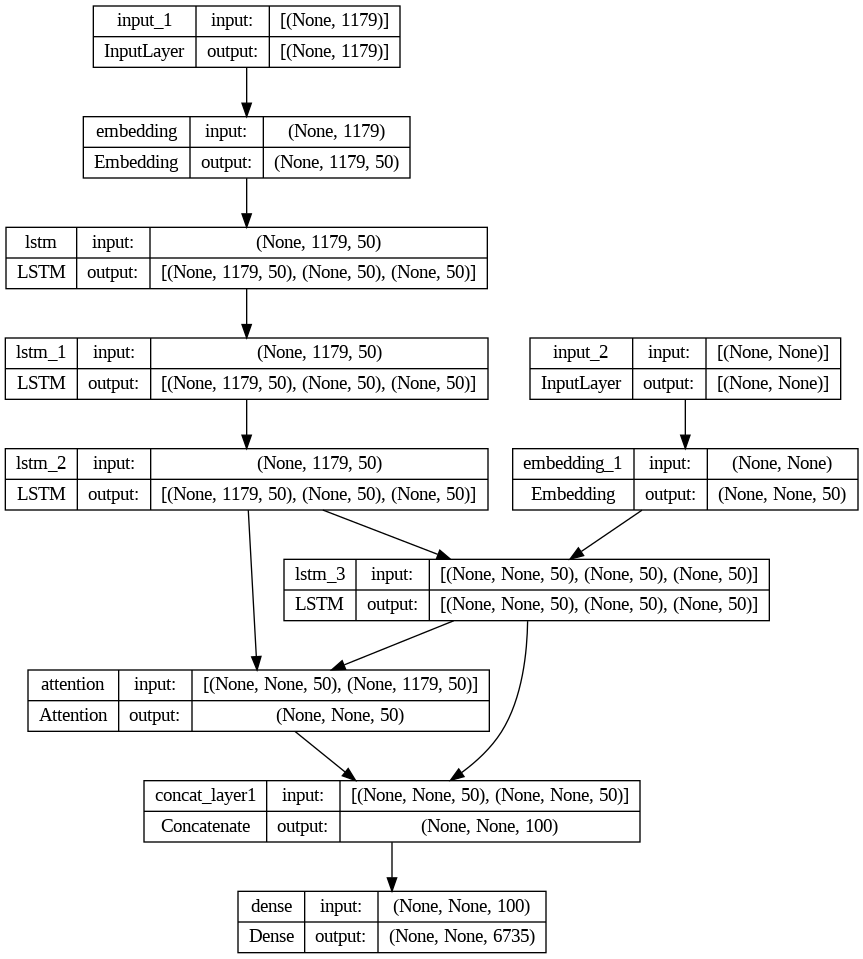

In [40]:
model = Model([en_inputs,dec_inputs],dec_outputs)
model.summary()
plot_model(model,to_file = 'model_plot.png',show_shapes = True,show_layer_names = True)

In [41]:
import tensorflow as tf

# Limit GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [42]:
from tensorflow.keras import mixed_precision

# Enable mixed precision training
mixed_precision.set_global_policy('mixed_float16')

In [43]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit([en_in_data,dec_in_data],dec_tr_data,batch_size=32,epochs=3,validation_split=0.1)
model.save("s2s")

Epoch 1/3
6/6 [==============================] - 16s 623ms/step - loss: 8.7509 - accuracy: 0.6931 - val_loss: 8.4251 - val_accuracy: 0.8515
Epoch 2/3
6/6 [==============================] - 2s 321ms/step - loss: 7.9055 - accuracy: 0.8447 - val_loss: 6.9979 - val_accuracy: 0.8515
Epoch 3/3
6/6 [==============================] - 2s 324ms/step - loss: 6.5033 - accuracy: 0.8447 - val_loss: 5.7489 - val_accuracy: 0.8515


In [ ]:
en_in_data = pad_sequences(x_test,maxlen = max_in_len,padding='post')
dec_data = pad_sequences(y_test,maxlen=max_tr_len,padding='post')

dec_in_data = dec_data[:,:-1]
dec_tr_data = dec_data.reshape(len(dec_data),max_tr_len,1)[:,1:]

In [52]:
reverse_target_word_index=tr_tokenizer.index_word
reverse_source_word_index=in_tokenizer.index_word
target_word_index=tr_tokenizer.word_index

In [63]:
# Generate predictions on the testing set
predictions = model.predict([en_in_data,dec_in_data])

7/7 [==============================] - 0s 57ms/step


In [64]:
predictions

array([[[0.00121905, 0.0001368 , 0.00046812, ..., 0.00015845,
         0.00015981, 0.00014688],
        [0.00128085, 0.00013742, 0.00047798, ..., 0.00015784,
         0.00016019, 0.00014646],
        [0.00136482, 0.00013832, 0.00049197, ..., 0.00015732,
         0.00016001, 0.00014566],
        ...,
        [0.00534233, 0.00014413, 0.00093516, ..., 0.00015759,
         0.00014765, 0.00014738],
        [0.00534233, 0.00014413, 0.00093516, ..., 0.00015759,
         0.00014765, 0.00014738],
        [0.00534233, 0.00014413, 0.00093516, ..., 0.00015759,
         0.00014765, 0.00014738]],

       [[0.00121952, 0.0001368 , 0.00046822, ..., 0.00015845,
         0.00015981, 0.00014688],
        [0.00128326, 0.00013737, 0.00047842, ..., 0.00015768,
         0.00016021, 0.00014638],
        [0.00136857, 0.00013835, 0.00049309, ..., 0.00015723,
         0.00016   , 0.00014556],
        ...,
        [0.00534546, 0.00014413, 0.00093545, ..., 0.00015758,
         0.00014765, 0.00014738],
        [0.0

In [ ]:
from rouge import Rouge
from nltk.translate.bleu_score import corpus_bleu

# Convert predictions to text summaries
predicted_summaries = []
for prediction in predictions:
    summary = decode_sequence(prediction, reverse_target_word_index)
    predicted_summaries.append(summary)

# Convert target sequences to text summaries
target_summaries = []
for target_seq in decoder_input_test:
    summary = decode_sequence(target_seq, reverse_target_word_index)
    target_summaries.append(summary)

# Compute ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(predicted_summaries, target_summaries, avg=True)

# Compute BLEU score
references = [[summary.split()] for summary in target_summaries]
hypotheses = [summary.split() for summary in predicted_summaries]
bleu_score = corpus_bleu(references, hypotheses)

# Print evaluation results
print("ROUGE scores: ", scores)
print("BLEU score: ", bleu_score)
